In [1]:
from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

In [2]:
county_xs=[
    us_counties.data[code]['lons'] for code in us_counties.data
    if us_counties.data[code]['state'] == 'tx'
]
county_ys=[
    us_counties.data[code]['lats'] for code in us_counties.data
    if us_counties.data[code]['state'] == 'tx'
]

In [3]:
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

In [4]:
county_colors = []
for county_id in us_counties.data:
    if us_counties.data[county_id]['state'] != 'tx':
        continue
    try:
        rate = unemployment.data[county_id]
        idx = min(int(rate/2), 5)
        county_colors.append(colors[idx])
    except KeyError:
        county_colors.append("black")



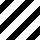
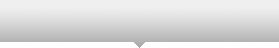
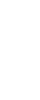
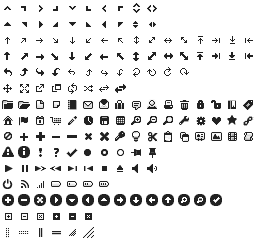
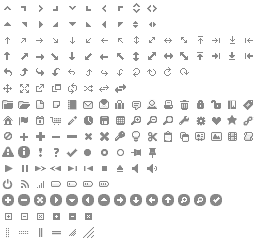
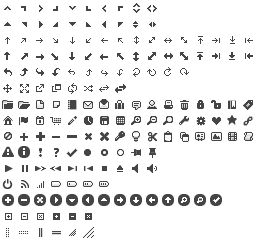
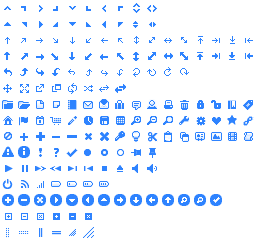
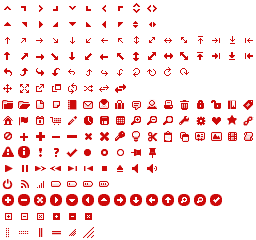
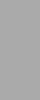
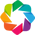
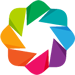
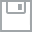
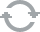
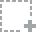
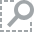
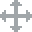
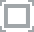
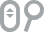

In [5]:
output_notebook()

In [6]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches(county_xs, county_ys, 
    fill_color=county_colors, fill_alpha=0.7,
    line_color="white", line_width=0.5)

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("fill color", "$color[hex, swatch]:fill_color"),
]

In [7]:
show(p)